**PROJECT TEAM ID**: PTID-CDS-DEC-25-3640  

**PROJECT CODE** : PRCP-1020-House Price Prediction

**TEAM MEMBER** : DIYA PANWAR and AZIM HAQUE

**PROJECT NAME** : House Price Prediction

## Task 1 : Data Analyis Report

__1.  Introduction__

The objective of this project is to analyze the Ames Housing dataset and identify the key factors that influence house prices. The dataset contains information about residential homes with various numerical and categorical features.

__2. Dataset Overview__

The dataset consists of multiple features describing the physical characteristics, location, and quality of houses. The target variable in this dataset is SalePrice, which represents the final selling price of a house.

__3. Data Understanding__

* The dataset contains both numerical and categorical variables.

* Numerical features include area, number of rooms, construction year, and quality ratings.

* Categorical features include neighborhood, zoning type, house style, and sale condition.

__4. Missing Value Analysis__

Several columns contained missing values. Some features such as Alley, PoolQC, and Fence had a very high percentage of missing values.

Handling Strategy:

* Columns with more than 40% missing values were removed.

* Remaining numerical missing values were filled using the median.

* Categorical missing values were filled using the mode.

__5. Exploratory Data Analysis (EDA)__

5.1 Sale Price Distribution

* The distribution of SalePrice is right-skewed, indicating that most houses fall into the mid-price range, while fewer houses have very high prices.

5.2 Relationship Between Features and Sale Price

* Overall Quality shows a strong positive relationship with SalePrice.

* Above Ground Living Area (GrLivArea) increases as SalePrice increases.

* Garage Capacity and Basement Area also contribute positively to house prices.

5.3 Neighborhood Analysis

* Certain neighborhoods show significantly higher median house prices, indicating that location plays a crucial role in determining property value.

__6. Correlation Analysis__

Correlation analysis shows that features such as OverallQual, GrLivArea, GarageCars, and TotalBsmtSF are strongly correlated with SalePrice. These features are important predictors for house price prediction.

__7. Key Insights__

* House quality and size are the most important factors affecting price.

* Location significantly impacts house prices.

* Houses with better amenities such as garages and basements tend to have higher prices.

__8. Conclusion__

The data analysis provided valuable insights into the factors influencing house prices. These insights were later used to build machine learning models for accurate house price prediction.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("train (1).csv")   # filename check kar lena

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.shape

(1460, 81)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
df.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
dtype: int64

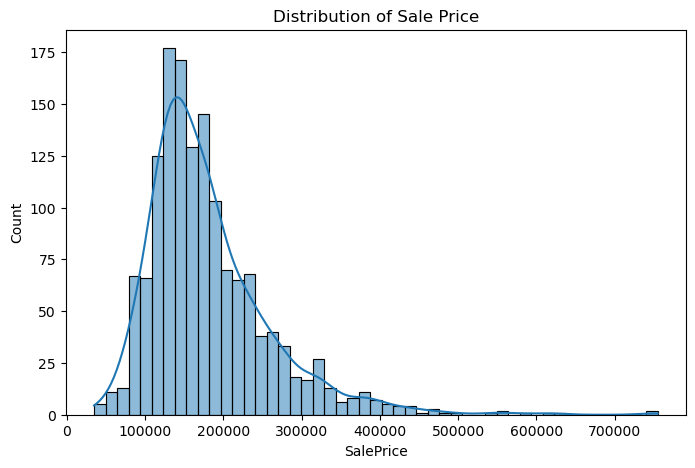

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

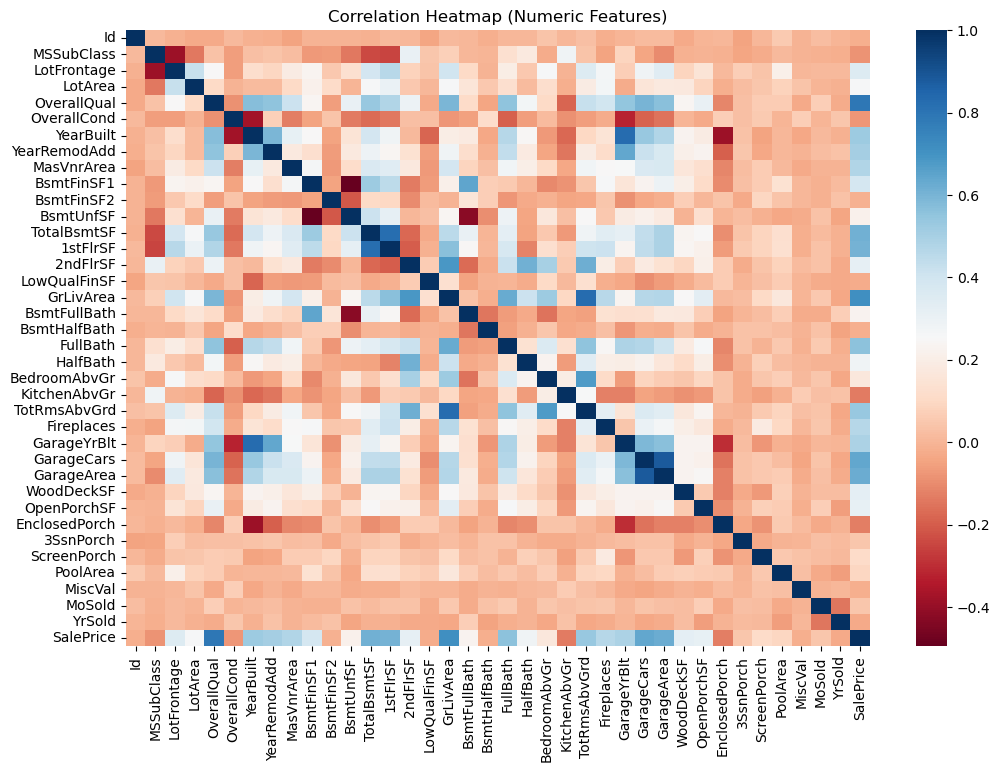

In [28]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

sns.heatmap(corr, cmap='RdBu')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [29]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
missing_percent.head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
dtype: float64

In [30]:
df = df.drop(columns=missing_percent[missing_percent > 40].index)

In [31]:
# Numerical columns → median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

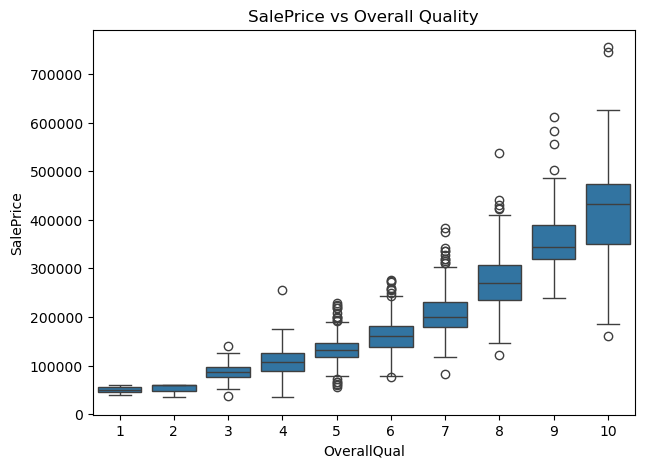

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("SalePrice vs Overall Quality")
plt.show()

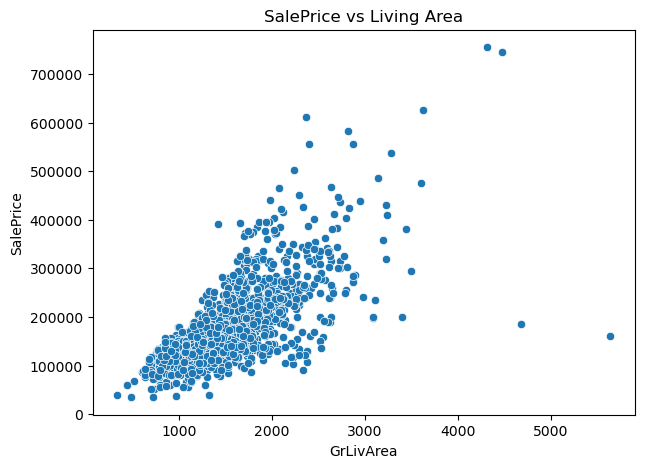

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("SalePrice vs Living Area")
plt.show()

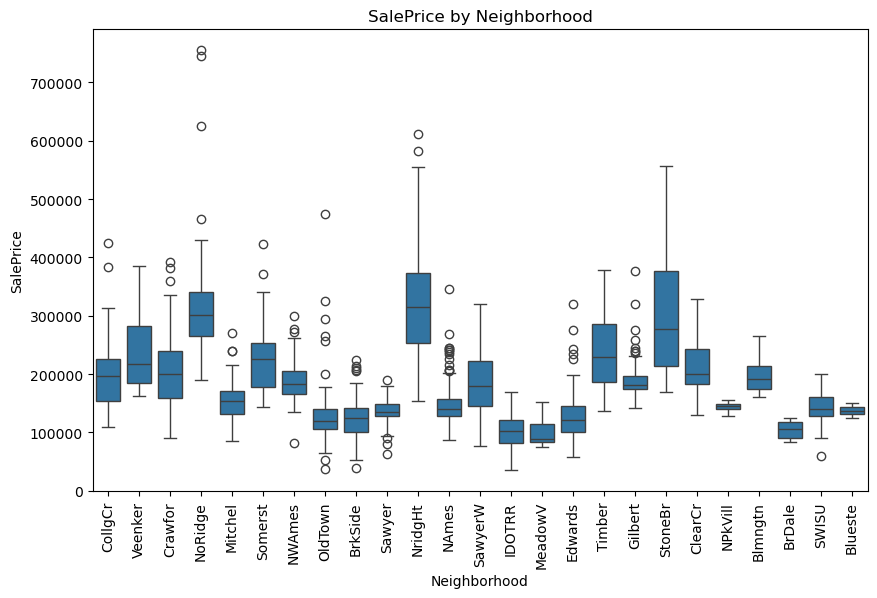

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.show()

In [37]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [38]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression R2:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression R2: 0.6475804521594759
Linear Regression RMSE: 51992.0464468


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R2:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest R2: 0.8898902789159175
Random Forest RMSE: 29061.615221754313


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting R2:", r2_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)

Gradient Boosting R2: 0.8981503294148259
Gradient Boosting RMSE: 27950.316590028757


In [43]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

OverallQual    0.557312
GrLivArea      0.120895
2ndFlrSF       0.034139
TotalBsmtSF    0.034134
BsmtFinSF1     0.029357
1stFlrSF       0.025763
LotArea        0.017886
GarageArea     0.016116
GarageCars     0.012533
YearBuilt      0.011213
dtype: float64

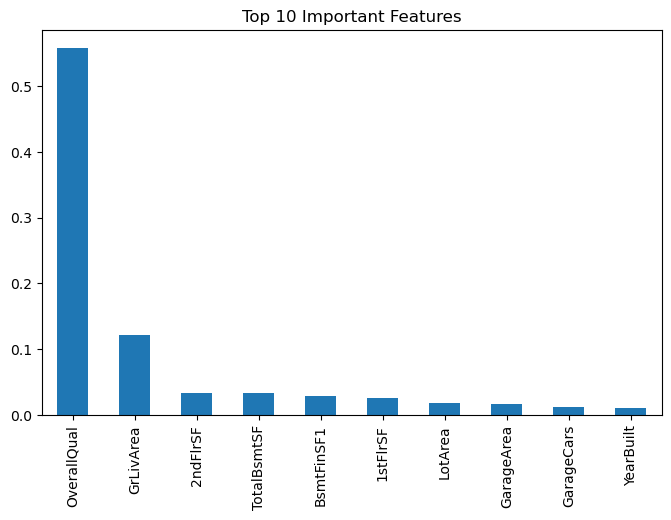

In [44]:
feature_importance.head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

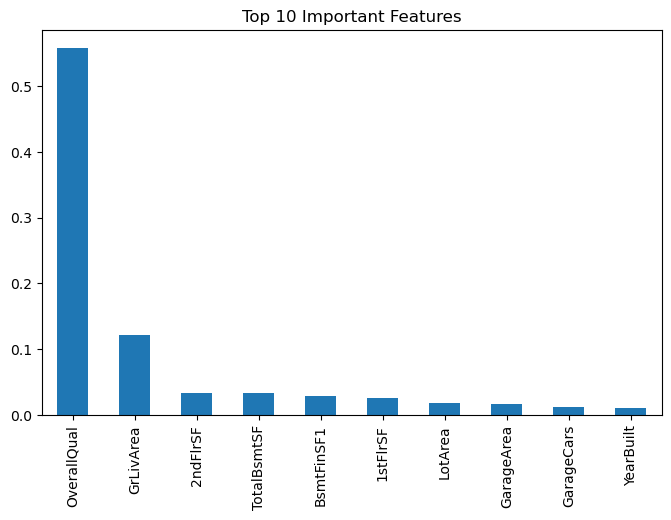

In [45]:
feature_importance.head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

Among all models, Random Forest and Gradient Boosting performed better than Linear Regression. Random Forest achieved the highest R² score and lowest RMSE, making it the best model for house price prediction.

## 

## Task - 3 Customer Suggestion

**House Buying Suggestions Based on Data Analysis**

**1. Budget-Friendly Houses**

Customers with a limited budget should consider houses with moderate overall quality and smaller living areas. Neighborhoods that show lower median sale prices can offer good value-for-money properties without compromising basic amenities.

**2. Family-Oriented Buyers**

Families looking for comfortable living should prioritize features such as higher Overall Quality, larger living area (GrLivArea), multiple bedrooms, and good neighborhood conditions. Houses with garages and basements also add extra utility for families.

**3. Investment Purpose Buyers**

For investment purposes, buyers should focus on houses located in high-demand neighborhoods where property prices have consistently remained high. Features like better construction quality, larger plot area, and proximity to amenities significantly increase resale value.

**4. Premium Buyers**

Premium buyers should target houses with excellent overall quality, modern construction, larger living spaces, and high-end neighborhoods. Such properties tend to retain their value and show better appreciation over time.

**5. Key Factors to Consider**

Based on the model and feature importance analysis, the most important factors influencing house prices are Overall Quality, Living Area, Garage Capacity, and Neighborhood. Buyers should carefully evaluate these features before making a purchase decision.

## Challenges Faced During the Project

**1.Missing Values in Dataset**

The dataset contained several columns with missing values, especially categorical features such as Alley, PoolQC, and Fence. Handling these missing values was challenging as improper treatment could affect model performance.

**Solution:**
Columns with more than 40% missing values were dropped. Remaining missing values were handled using median imputation for numerical features and mode imputation for categorical features.

**2. Large Number of Categorical Variables**

The dataset included many categorical variables which cannot be directly used in machine learning models.

**Solution:**
One-hot encoding was applied to convert categorical variables into numerical format, making them suitable for model training.

**3. Feature Selection and High Dimensionality**

After encoding, the number of features increased significantly, which could lead to overfitting.

**Solution:**
Tree-based models like Random Forest and Gradient Boosting were used as they handle high-dimensional data efficiently and provide feature importance.

**4. Model Selection**

Choosing the best model for house price prediction was challenging due to variations in model performance.

**Solution:**
Multiple models were evaluated using R² score and RMSE. Based on the comparison, Random Forest and Gradient Boosting showed better performance.

**5. Overfitting Risk**

Complex models may overfit the training data.

**Solution:**
Train-test split and evaluation on unseen test data helped ensure that the model generalized well.

In [46]:
final_predictions = rf.predict(X_test)

# Actual vs Predicted comparison
output = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': final_predictions
})
output.head(15)

,Actual Price,Predicted Price
0,154500,142194.00
1,325000,321263.97
2,115000,117652.75
3,159000,155514.20
4,315500,322747.85
5,75500,87079.50
6,311500,209996.82
7,146000,150093.00
8,84500,86890.16
9,135500,129152.69


In [44]:
print("Final Model R2 Score:", r2_rf)
print("Final Model RMSE:", rmse_rf)

Final Model R2 Score: 0.8898902789159175
Final Model RMSE: 29061.615221754313


In [62]:
sample_house = X_test.iloc[[0]]
predicted_price = rf.predict(sample_house)

print("Predicted House Price:", predicted_price)

Predicted House Price: [142194.]
